In [1]:
import time
import mlrose_hiive as mlrose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.utils import parallel_backend

random_state = 7
start = 10
stop = 101
step = 10
size = 20
problem_name = "Tuning"
plt.style.use('ggplot')

### Tuning Parameters

In [2]:
weights = np.random.uniform(low=1, high=10, size=size).astype('int')
values = np.random.uniform(low=10, high=100, size=size).astype('int')
max_weight_pct = 0.6
fitness = mlrose.Knapsack(weights, values, max_weight_pct=max_weight_pct)

problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)
algo_stats = []

In [3]:
# MIMIC
for max_attempts in range(start, stop, step):
    print("MIMIC")
    print("\t Attempt: {}\n".format(max_attempts))
    start_time = time.time()*100
    best_state, best_fitness, curve_vals = mlrose.mimic(problem, max_attempts=max_attempts, curve=True, random_state=random_state)
    stop_time = time.time()*100
    runtime = stop_time - start_time
    algo_stats.append([problem_name, "Default", best_state, best_fitness, max_attempts, curve_vals.size, curve_vals, runtime])


MIMIC
	 Attempt: 10

MIMIC
	 Attempt: 20

MIMIC
	 Attempt: 30

MIMIC
	 Attempt: 40

MIMIC
	 Attempt: 50

MIMIC
	 Attempt: 60

MIMIC
	 Attempt: 70

MIMIC
	 Attempt: 80

MIMIC
	 Attempt: 90

MIMIC
	 Attempt: 100



MIMIC
	 Attempt: 10

MIMIC
	 Attempt: 20

MIMIC
	 Attempt: 30

MIMIC
	 Attempt: 40

MIMIC
	 Attempt: 50

MIMIC
	 Attempt: 60

MIMIC
	 Attempt: 70

MIMIC
	 Attempt: 80

MIMIC
	 Attempt: 90

MIMIC
	 Attempt: 100

MIMIC
	 Attempt: 10

MIMIC
	 Attempt: 20

MIMIC
	 Attempt: 30

MIMIC
	 Attempt: 40

MIMIC
	 Attempt: 50

MIMIC
	 Attempt: 60

MIMIC
	 Attempt: 70

MIMIC
	 Attempt: 80

MIMIC
	 Attempt: 90

MIMIC
	 Attempt: 100

MIMIC
	 Attempt: 10

MIMIC
	 Attempt: 20

MIMIC
	 Attempt: 30

MIMIC
	 Attempt: 40

MIMIC
	 Attempt: 50

MIMIC
	 Attempt: 60

MIMIC
	 Attempt: 70

MIMIC
	 Attempt: 80

MIMIC
	 Attempt: 90

MIMIC
	 Attempt: 100

MIMIC
	 Attempt: 10

MIMIC
	 Attempt: 20

MIMIC
	 Attempt: 30

MIMIC
	 Attempt: 40

MIMIC
	 Attempt: 50

MIMIC
	 Attempt: 60

MIMIC
	 Attempt: 70

MIMIC
	 Attempt: 80

MIMIC
	 Attempt: 90

MIMIC
	 Attempt: 100

MIMIC
	 Attempt: 10

MIMIC
	 Attempt: 20

MIMIC
	 Attempt: 30

MIMIC
	 Attempt: 40

MIMIC
	 Attempt: 50

MIMIC
	 Attempt: 60

MIMIC
	 Attempt: 70

MIMIC
	 A

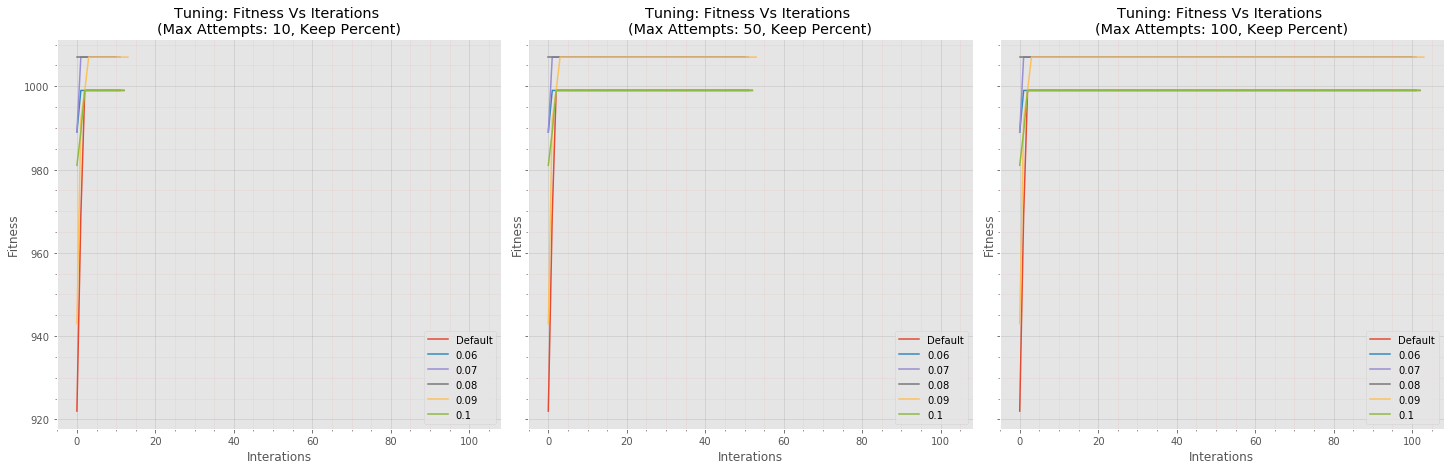

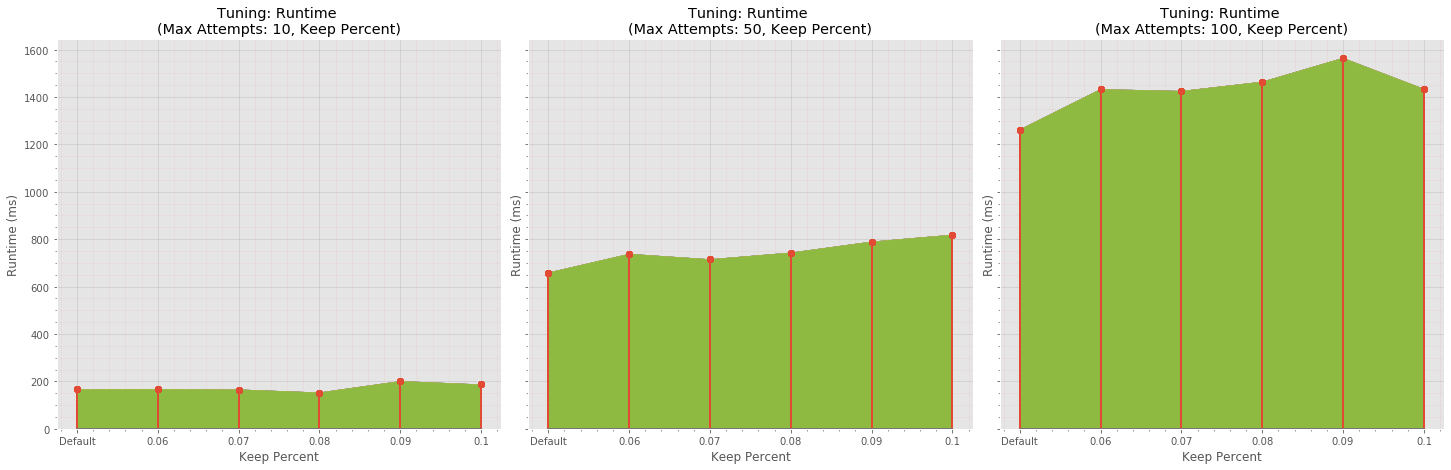

In [4]:
with parallel_backend('threading'):
    for i in np.arange(0.06, 0.11, 0.01):
        i = i.round(2)
        for max_attempts in range(start, stop, step):
            print("MIMIC")
            print("\t Attempt: {}\n".format(max_attempts))
            start_time = time.time()*100
            best_state, best_fitness, curve_vals = mlrose.mimic(problem, 
                                                                max_attempts=max_attempts, 
                                                                curve=True, 
                                                                random_state=random_state,
                                                                keep_pct=i,
                                                                pop_size=1000)
            stop_time = time.time()*100
            runtime = stop_time - start_time
            algo_stats.append([problem_name, str(i), best_state, best_fitness, max_attempts, curve_vals.size, curve_vals, runtime])


dfstats = pd.DataFrame(algo_stats, columns=['Problem', 'Algorithm', 'Best_State', 'Best_Fitness', 'Max_Attempts', 'Iterations', 'Fitness', 'Runtime'])

dfstats.sort_values(['Best_Fitness', 'Iterations'], ascending=[False, True]).iloc[0]

plt.close('all')
fig, axs = plt.subplots(1, 3, figsize=(20, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)
fig.tight_layout()
for ax, max_attempts in zip(axs.ravel(), [10, 50, 100]):
    for i in range(0, dfstats[dfstats['Max_Attempts']==max_attempts].shape[0]):
        ax.plot(dfstats[dfstats['Max_Attempts']==max_attempts].iloc[i]['Fitness'], 
                label=dfstats[dfstats['Max_Attempts']==max_attempts].iloc[i]['Algorithm'])
        ax.set_title('{}: Fitness Vs Iterations \n(Max Attempts: {}, Keep Percent)'.format(problem_name, max_attempts))
        ax.legend(loc='lower right')
        ax.set_xlabel('Interations')
        ax.set_ylabel('Fitness')
        ax.minorticks_on()
        ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)
        ax.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.05)
    

plt.savefig("{}_Fitness_With_Keep_Percent.png".format(problem_name), bbox_inches='tight')  

fig, axs = plt.subplots(1, 3, figsize=(20, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)
fig.tight_layout()
for ax, max_attempts in zip(axs.ravel(), [10, 50, 100]):
    for i in range(0, dfstats[dfstats['Max_Attempts']==max_attempts].shape[0]):
        ax.stem(dfstats[dfstats['Max_Attempts']==max_attempts]['Algorithm'], dfstats[dfstats['Max_Attempts']==max_attempts]['Runtime'])
        ax.stackplot(dfstats[dfstats['Max_Attempts']==max_attempts]['Algorithm'], dfstats[dfstats['Max_Attempts']==max_attempts]['Runtime'], labels=dfstats[dfstats['Max_Attempts']==max_attempts]['Algorithm'])
        ax.set_title('{}: Runtime \n(Max Attempts: {}, Keep Percent)'.format(problem_name, max_attempts))
        ax.set_xlabel('Keep Percent')
        ax.set_ylabel('Runtime (ms)')
        ax.minorticks_on()
        ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)
        ax.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.05)

plt.savefig("{}_Runtime_With_Keep_Percent.png".format(problem_name), bbox_inches='tight') 